# Extra Trees Classification


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from joblib import dump
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../../../../Datasets/SocialNetworkAds.csv")
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [5]:
etc = ExtraTreesClassifier(max_depth=4, random_state=0)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

In [6]:
etc_con_matrix = confusion_matrix(y_test, y_pred)
etc_acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix", "\n", etc_con_matrix, "\n")
print("Accuracy of Extra Trees Classification :", etc_acc * 100, "\n")  # type: ignore
print("Classification Report", "\n", classification_report(y_test, y_pred))

Confusion Matrix 
 [[31  1]
 [ 1  7]] 

Accuracy of Extra Trees Classification : 95.0 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      0.88      0.88         8

    accuracy                           0.95        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.95      0.95      0.95        40



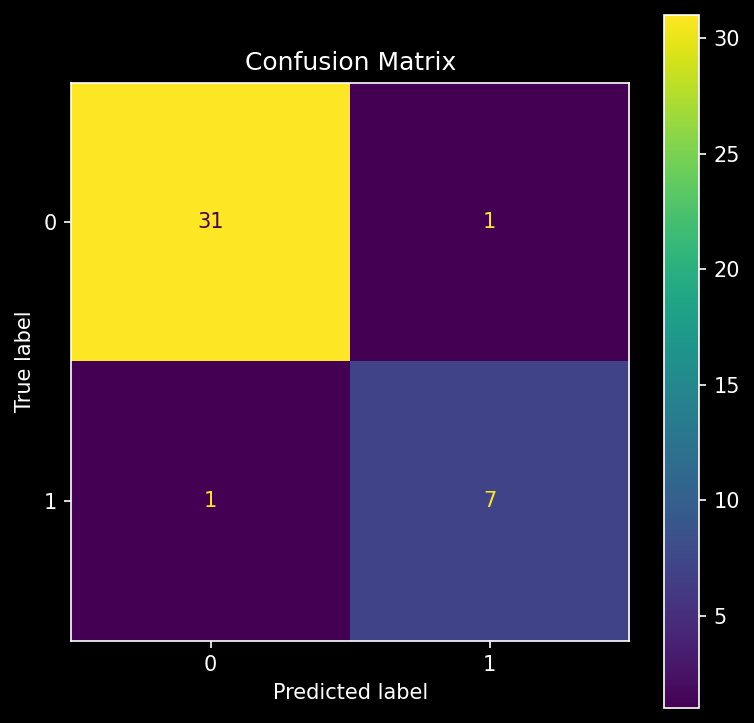

In [7]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ConfusionMatrixDisplay(etc_con_matrix).plot(ax=ax)
plt.title("Confusion Matrix")
plt.savefig(
    "Images/Confusion_Matrix_Extra_Trees_Classification.png", bbox_inches="tight"
)

In [8]:
y_score = etc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

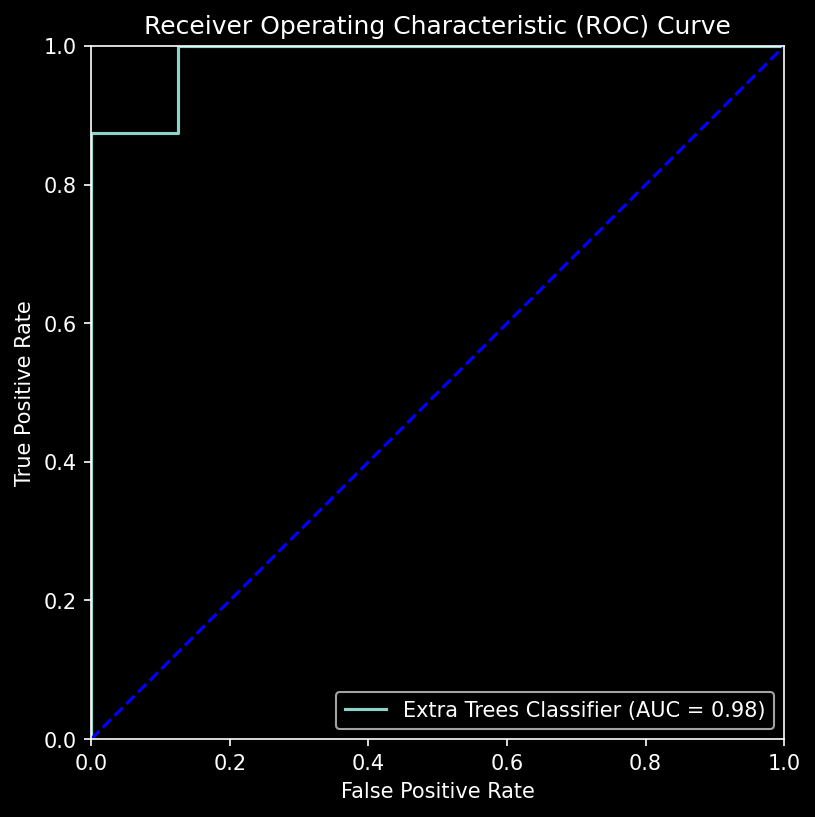

In [9]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Extra Trees Classifier"
).plot(ax=ax)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("Images/ROC_Curve_Extra_Trees_Classification.png", bbox_inches="tight")

In [10]:
print(
    "Area Under the Receiver Operating Characteristic Curve :",
    roc_auc_score(y_test, y_score),
)

Area Under the Receiver Operating Characteristic Curve : 0.984375


In [11]:
dump(etc, "../../../../Models/extraTreesClassifier.joblib")

['../../../../Models/extraTreesClassifier.joblib']